# Predicting Life Satisfaction with NHS Data: Which Lifestyle factors are most important for LS?

Website: https://www.cdc.gov/nchs/nhis/documentation/2023-nhis.html

Dataset: C:\Users\sacar\OneDrive\Documents\Projects\Predicting MH with NHS Data\adult23.csv

Description: 



In [34]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#Import data
df = pd.read_csv(r'C:\Users\sacar\OneDrive\Documents\Projects\Predicting MH with NHS Data\adult23.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Columns: 647 entries, URBRRL to POVRATTC_A
dtypes: float64(442), int64(204), object(1)
memory usage: 145.7+ MB


In [6]:
df.head(2)

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,3,4,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,7371.139,H029691,1.01
1,4,8,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,3146.794,H028812,2.49


In [7]:
df.describe()

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,POVRATTC_A
count,29522.000000,29522.000000,29522.000000,29522.000000,4049.000000,3973.000000,4049.000000,4049.000000,22104.000000,29522.000000,...,29522.000000,537.000000,553.000000,29522.000000,29522.0,29522.000000,29522.0,29522.0,29522.000000,29522.000000
mean,2.317119,9.666757,0.041664,0.373721,1.453445,1.480997,1.301309,1.392937,2.063563,31.375246,...,2.460369,1.286778,1.039783,1.205542,1.0,6.472089,10.0,1.0,8747.291918,4.106340
std,1.061522,4.048065,0.199823,0.712244,0.801351,0.790779,0.631127,0.734160,1.287790,29.253976,...,1.074983,0.668921,0.338166,1.087867,0.0,3.444791,0.0,0.0,5690.650182,2.961649
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,10.0,1.0,1792.441000,0.000000
25%,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,...,2.000000,1.000000,1.000000,1.000000,1.0,3.000000,10.0,1.0,4643.531750,1.800000
50%,2.000000,10.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,24.000000,...,2.000000,1.000000,1.000000,1.000000,1.0,7.000000,10.0,1.0,7374.546000,3.310000
75%,3.000000,14.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,48.000000,...,3.000000,1.000000,1.000000,1.000000,1.0,9.000000,10.0,1.0,10994.809500,5.650000
max,4.000000,14.000000,1.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,153.000000,...,9.000000,4.000000,8.000000,8.000000,1.0,12.000000,10.0,1.0,39925.600000,11.000000


In [8]:
df_copy = df.copy()

# Pre-Processing

In [9]:
print(df_copy["LSATIS4_A"].info())  # Check column type and non-null values

print(df_copy["LSATIS4_A"].unique())  # Show unique values


<class 'pandas.core.series.Series'>
RangeIndex: 29522 entries, 0 to 29521
Series name: LSATIS4_A
Non-Null Count  Dtype
--------------  -----
29522 non-null  int64
dtypes: int64(1)
memory usage: 230.8 KB
None
[2 1 3 9 4 7]


# Missing Values - Dropping Columns and Rows

In [10]:
# Calculate missing value percentages
missing_percent = df_copy.isnull().sum() / len(df_copy) * 100

# Print summary
print(missing_percent.describe())

count    647.000000
mean      52.059685
std       42.190768
min        0.000000
25%        0.000000
50%       62.421245
75%       93.630174
max      100.000000
dtype: float64


In [11]:
# Check missing values for all columns and display the count and percentage
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / len(df_copy)) * 100

# Count columns with missing values
missing_columns_count = (df_copy.isnull().sum() > 0).sum()
print(f"Number of columns with missing values: {missing_columns_count}")


# Filter only columns with missing values
missing_data = missing_values[missing_values > 0]

# Print missing values and percentages
print("Columns with Missing Values:")
for col in missing_data.index:
    print(f"{col}: {missing_data[col]} missing ({missing_percentage[col]:.2f}%)")


Number of columns with missing values: 440
Columns with Missing Values:
LANGSPECR_A: 25473 missing (86.28%)
LANGSOC_A: 25549 missing (86.54%)
LANGDOC_A: 25473 missing (86.28%)
LANGMED_A: 25473 missing (86.28%)
LANGHM_A: 7418 missing (25.13%)
SCHDYMSSTC_A: 27881 missing (94.44%)
AFNOW: 8099 missing (27.43%)
REPWRKDYTC_A: 28193 missing (95.50%)
YRSINUS_A: 24820 missing (84.07%)
PRTNREDUCP_A: 27652 missing (93.67%)
SPOUSEDUCP_A: 17305 missing (58.62%)
SASPPRACE_A: 15434 missing (52.28%)
SASPPHISP_A: 15434 missing (52.28%)
PRTNRAGETC_A: 27651 missing (93.66%)
SPOUSAGETC_A: 17305 missing (58.62%)
PRTNRWKFT_A: 28118 missing (95.24%)
PRTNRWRK_A: 27660 missing (93.69%)
SPOUSWKFT_A: 21989 missing (74.48%)
SPOUSWRK_A: 17356 missing (58.79%)
SPOUSESEX_A: 17306 missing (58.62%)
PRTNRSEX_A: 27651 missing (93.66%)
INJWRKDYTC_A: 27562 missing (93.36%)
NUMINJTC_A: 27562 missing (93.36%)
SHINGYEARP_A: 22275 missing (75.45%)
HHRESPSA_FLG: 8637 missing (29.26%)
EPINUMSEZP_A: 28954 missing (98.08%)
EMPDYS

In [12]:
# Recalculate missing percentages based on df_copy
missing_percent = (df_copy.isnull().sum() / len(df_copy)) * 100  

# Select only columns where missing percentage is less than 50%
df_copy = df_copy.loc[:, missing_percent < 50]

print(f"Remaining columns after dropping: {df_copy.shape[1]}")

Remaining columns after dropping: 294


In [13]:
# Check how many missing values remain
total_missing = df_copy.isnull().sum().sum()
print(f"Total missing values after dropping columns: {total_missing}")

Total missing values after dropping columns: 733072


In [14]:
# Calculate the threshold (50% of total columns)
valid_data_threshold = int(df_copy.shape[1] * 0.8)

# Count rows that have at least 50% valid (non-missing) data
rows_with_80_valid = (df_copy.notnull().sum(axis=1) >= valid_data_threshold).sum()

# Print results
print(f"Total rows: {df_copy.shape[0]}")
print(f"Rows with at least 80% valid data: {rows_with_80_valid}")
print(f"Percentage of rows with ≥80% valid data: {(rows_with_80_valid / df_copy.shape[0]) * 100:.2f}%")


Total rows: 29522
Rows with at least 80% valid data: 29225
Percentage of rows with ≥80% valid data: 98.99%


In [15]:
df_copy = df_copy.dropna(thresh=int(df_copy.shape[1] * 0.8))
print(f"New total rows after dropping low-validity rows: {df_copy.shape[0]}")


New total rows after dropping low-validity rows: 29225


In [16]:
print(f"Total missing values after row filtering: {df_copy.isnull().sum().sum()}")


Total missing values after row filtering: 713714


Drop single categorical column for now.

In [17]:
df_copy = df_copy.select_dtypes(exclude=['object'])

# Train/Test Split

In [18]:
# Separate target variable (Life Satisfaction)
y = df_copy["LSATIS4_A"]  # Target variable
X = df_copy.drop(columns=["LSATIS4_A"])  # Features (everything except target)

# Confirm separation
print(f"Feature Set (X): {X.shape}")
print(f"Target (y): {y.shape}")


Feature Set (X): (29225, 292)
Target (y): (29225,)


In [19]:
#Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")

X_train shape: (20457, 292), X_val shape: (8768, 292)
y_train shape: (20457,), y_val shape: (8768,)


In [20]:
# Keep only valid target labels (1, 2, 3, 4)
valid_classes = [1, 2, 3, 4]
mask = y_train.isin(valid_classes)
X_train = X_train[mask]
y_train = y_train[mask]

mask_val = y_val.isin(valid_classes)
X_val = X_val[mask_val]
y_val = y_val[mask_val]

print(f"🔹 New training set size: {X_train.shape[0]}")
print(f"🔹 New validation set size: {X_val.shape[0]}")


🔹 New training set size: 20408
🔹 New validation set size: 8747


# Imputation

In [21]:
# Replace NaNs with median values

# Fill missing values in X_train using median
X_train.fillna(X_train.median(), inplace=True)

# Apply same imputation to X_val using X_train's median values
X_val.fillna(X_train.median(), inplace=True)

# Confirm no missing values remain
print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_val after imputation: {X_val.isnull().sum().sum()}")


Missing values in X_train after imputation: 0
Missing values in X_val after imputation: 0


# Feature Selection

# Spearman Correlation
-Randomly select which feature to drop from two highly-correlated features.

In [22]:
# Compute correlation matrix
corr_matrix = X_train.corr(method='spearman').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop highly correlated features from both train and validation sets
X_train = X_train.drop(columns=high_corr_features)
X_val = X_val.drop(columns=high_corr_features)

print(f"Dropped {len(high_corr_features)} highly correlated features.")
print(f"New X_train shape: {X_train.shape}, New X_val shape: {X_val.shape}")


Dropped 32 highly correlated features.
New X_train shape: (20408, 260), New X_val shape: (8747, 260)


# Feature Selection Methods Explored

I tested multiple feature selection methods to determine the most effective feature subset for **RandomForestClassifier**. The following approaches were compared:

### **Feature Selection Methods Tested**
- **RFE (Recursive Feature Elimination) with Random Forest**
  - **Top 30 features only**
  - **All features included**
- **LASSO Regression-based Feature Selection**
  - **Top 30 LASSO-selected features**
  - **All features with non-zero LASSO coefficients**
- **Hybrid Approaches**
  - **Weighted combination** of the top 30 RFE & LASSO-selected features
  - **Unweighted union** of **RFECV-selected** features & all LASSO-important features
- **RFECV (Recursive Feature Elimination with Cross-Validation)**
  - Automatically selects the optimal number of features via cross-validation

---

### **📌 Final Selection: RFECV**
After testing the above methods, **RFECV (Random Forest + Recursive Feature Elimination with Cross-Validation) provided the best model performance** and was selected as the final feature selection method.

# RFECV to select the optimal number of features 

In [23]:
# 🔹 Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=0, class_weight="balanced")

# 🔹 Use RFECV to determine the optimal number of features
rfecv = RFECV(estimator=rf_classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)

# 🔹 Get the optimal number of features
optimal_features = X_train.columns[rfecv.support_]  # Boolean mask of selected features
num_selected_features = sum(rfecv.support_)  # Count selected features

# 🔹 Print results
print(f"✅ Optimal number of features selected by RFECV: {num_selected_features}")
print(f"🔹 Selected Features: {list(optimal_features)}")

# 🔹 Filter dataset to keep only selected features
X_train_selected = X_train[optimal_features]
X_val_selected = X_val[optimal_features]



✅ Optimal number of features selected by RFECV: 154
🔹 Selected Features: ['URBRRL', 'RATCAT_A', 'IMPINCFLG_A', 'PPSU', 'PSTRAT', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'LEGMSTAT_A', 'MARSTAT_A', 'PCNTADWFP1_A', 'FDSCAT4_A', 'EMPDYSMSS3_A', 'EMPWRKLSW1_A', 'EMPWKHRS3_A', 'EMDOCCUPN2_A', 'EMDINDSTN2_A', 'SMKECIGST_A', 'SMKCIGST_A', 'BMICAT_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'PCNT18UPTC', 'PCNTLT18TC', 'PHQ2SCREEN_A', 'GAD2SCREEN_A', 'COVER_A', 'PLNWRKR1_A', 'PRIVATE_A', 'EXCHPR1_A', 'EDUCP_A', 'NUMCAN_A', 'HISDETP_A', 'REGION', 'INTV_QRT', 'SEX_A', 'AGEP_A', 'CEVOTELC_A', 'HOUSECOST_A', 'HOUTENURE_A', 'HOUYRSLIV_A', 'FDSBALANCE_A', 'INCRETIRE_A', 'INCSSISSDI_A', 'INCSSRR_A', 'INCINTER_A', 'INCWRKO_A', 'CEVOLUN1_A', 'EMDWRKCAT1_A', 'EMPSICKLV_A', 'HRFIREEV_A', 'HRLOUDJOB_A', 'HRTINNITUS_A', 'BALDIZZ_A', 'HRTESTLAST_A', 'HRTEST_A', 'CBALHDINJ_A', 'HRWHISP_A', 'AHEARST1_A', 'VIMDRIVE_A', 'VIMREAD_A', 'AVISEXAM_A', 'CIGAREV_A', 'PAITOOTH3M_A', 'PAIAPG3M_A', 'P

# Modelling

# K-Means Smote

In [ ]:
# Print class distribution before resampling
print("Class Distribution Before KSMOTE:")
print(y_train.value_counts())

# Apply KMeansSMOTE to only the training set
ksmote = KMeansSMOTE(
    sampling_strategy={3: int(y_train.value_counts()[3] * 2),  # Increase class 3
                       4: int(y_train.value_counts()[4] * 3)},  # Increase class 4
    random_state=0,
    cluster_balance_threshold=0.01
)

# ✅ Apply KSMOTE to training data (X_train_selected) but NOT validation data!
X_train_resampled, y_train_resampled = ksmote.fit_resample(X_train_selected, y_train)

# Print new class distribution after KSMOTE
print("\nClass Distribution After KSMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class Distribution Before KSMOTE:
LSATIS4_A
2    10556
1     8940
3      743
4      169
Name: count, dtype: int64


c:\Users\sacar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\sacar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(



Class Distribution After KSMOTE:
LSATIS4_A
2    10556
1     8940
3     1493
4      508
Name: count, dtype: int64


In [49]:
print(pd.Series(y_train_resampled).value_counts(normalize=True))

LSATIS4_A
2    0.491045
1    0.415872
3    0.069452
4    0.023631
Name: proportion, dtype: float64


In [51]:
from imblearn.over_sampling import ADASYN

# Print original class distribution
print("Before ADASYN Resampling:")
print(y_train.value_counts())

# Manually oversample minority classes
adasyn = ADASYN(
    sampling_strategy={3: 2000,  # Increase class 3 from 743 to 2000
                       4: 2000},  # Increase class 4 from 169 to 2000
    random_state=0
)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_selected, y_train)

# Print new class distribution
print("\nAfter ADASYN Resampling:")
print(pd.Series(y_train_resampled).value_counts())



Before ADASYN Resampling:
LSATIS4_A
2    10556
1     8940
3      743
4      169
Name: count, dtype: int64

After ADASYN Resampling:
LSATIS4_A
2    10556
1     8940
3     2080
4     2006
Name: count, dtype: int64


# Linear Regression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train_selected, y_train)

c:\Users\sacar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Calculate predictions for both training and validation sets
lr_train_preds = model.predict(X_train_selected)
lr_val_preds = model.predict(X_val_selected)

In [38]:
# Function to evaluate classification performance
def evaluate_classification(y_true, y_pred, dataset="Validation"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"🔹 {dataset} Set Metrics:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-score: {f1:.4f}\n")

# Evaluate on Training Set
evaluate_classification(y_train, lr_train_preds, dataset="Training")

# Evaluate on Validation Set
evaluate_classification(y_val, lr_val_preds, dataset="Validation")

🔹 Training Set Metrics:
  - Accuracy: 0.5160
  - Precision: 0.4706
  - Recall: 0.5160
  - F1-score: 0.3733

🔹 Validation Set Metrics:
  - Accuracy: 0.5129
  - Precision: 0.4454
  - Recall: 0.5129
  - F1-score: 0.3717



In [ ]:
# Get feature importance from model coefficients (for Linear Regression)
feature_importance = pd.DataFrame({
    "Feature": X_train_selected.columns,
    "Coefficient": model.coef_
})

# Sort by absolute coefficient value (most important first)
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features:")
print(feature_importance.head(20))


ValueError: Per-column arrays must each be 1-dimensional

# Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Reduce tree count
    "max_depth": [5, 10, 15],  # Limit depth
    "min_samples_split": [5, 10, 20],  # Reduce overfitting
    "min_samples_leaf": [2, 5, 10],  # Encourage generalization
    "max_features": ["sqrt"],  # Avoid overusing features
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, class_weight=None)

# Use RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=rf_classifier, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-Fold Cross-Validation
    verbose=2,
    n_jobs=-1  # Use all CPUs
)

# Fit to training data
random_search.fit(X_train_selected, y_train)

# Print the best hyperparameters
print("\n✅ Best Hyperparameters:")
print(random_search.best_params_)

# Use best model
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [32]:
# Train best model
best_rf.fit(X_train_selected, y_train)

# Make predictions
rf_train_preds = best_rf.predict(X_train_selected)
rf_val_preds = best_rf.predict(X_val_selected)

In [33]:
# Function to evaluate classification performance
def evaluate_classification(y_true, y_pred, dataset="Validation"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"🔹 {dataset} Set Metrics:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-score: {f1:.4f}\n")

# Evaluate on Training Set
evaluate_classification(y_train, rf_train_preds, dataset="Training")

# Evaluate on Validation Set
evaluate_classification(y_val, rf_val_preds, dataset="Validation")


🔹 Training Set Metrics:
  - Accuracy: 0.8748
  - Precision: 0.8853
  - Recall: 0.8748
  - F1-score: 0.8749

🔹 Validation Set Metrics:
  - Accuracy: 0.6647
  - Precision: 0.6527
  - Recall: 0.6647
  - F1-score: 0.6530



Current High-Score: F1 = .6413 using optimum # from just RFECV (New: F1 = .6436 w/ RFECV + KMeansSmote)

Tried:
All features
Top 30 RFE + Lasso Unweighted
Just RFECV => BEST
RFE (all features) + lasso (all features) weighted
RFECV + Lasso Union
RFECV+KMeansSmote


With SMOTE
🔹 Training Set Metrics:
  - Accuracy: 0.8794
  - Precision: 0.8829
  - Recall: 0.8794
  - F1-score: 0.8787

🔹 Validation Set Metrics:
  - Accuracy: 0.6705
  - Precision: 0.6547
  - Recall: 0.6705
  - F1-score: 0.6546

  w/ASYN
  🔹 Training Set Metrics:
  - Accuracy: 0.8784
  - Precision: 0.8813
  - Recall: 0.8784
  - F1-score: 0.8788

🔹 Validation Set Metrics:
  - Accuracy: 0.6657
  - Precision: 0.6540
  - Recall: 0.6657
  - F1-score: 0.6519


  With no SMOTE or ASAYWN (best because lowest overfitting):
  🔹 Training Set Metrics:
  - Accuracy: 0.7766
  - Precision: 0.7806
  - Recall: 0.7766
  - F1-score: 0.7597

🔹 Validation Set Metrics:
  - Accuracy: 0.6693
  - Precision: 0.6772
  - Recall: 0.6693
  - F1-score: 0.6528


# XGBoost

In [40]:
# Define hyperparameter grid for XGBoost
param_grid = {
    "n_estimators": [100, 200, 500],   # Number of boosting rounds
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    "max_depth": [3, 5, 7, 10],  # Maximum depth of trees
    "min_child_weight": [1, 3, 5],  # Minimum sum of weights for child nodes
    "gamma": [0, 0.1, 0.2, 0.3],  # Minimum loss reduction
    "subsample": [0.6, 0.8, 1.0],  # Percentage of samples per tree
    "colsample_bytree": [0.6, 0.8, 1.0],  # Percentage of features per split
    "scale_pos_weight": [1, 2, 3, 5],  # Adjust class imbalance
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss", random_state=0)

# Use RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=xgb_clf, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-Fold Cross-Validation
    verbose=2,
    n_jobs=-1  # Use all CPUs
)
# Shift class labels to start at 0
y_train_fixed = y_train - 1
y_val_fixed = y_val - 1

# Fit to training data
random_search.fit(X_train_selected, y_train_fixed)

# Print the best hyperparameters
print("\n✅ Best Hyperparameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\sacar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Best Hyperparameters:
{'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [46]:
# Train best model
best_xgb = random_search.best_estimator_

# Make predictions
xgb_train_preds = best_xgb.predict(X_train_selected) + 1
xgb_val_preds = best_xgb.predict(X_val_selected) + 1

In [47]:
# Evaluate on Training Set
evaluate_classification(y_train, xgb_train_preds, dataset="Training")

# Evaluate on Validation Set
evaluate_classification(y_val, xgb_val_preds, dataset="Validation")

🔹 Training Set Metrics:
  - Accuracy: 0.7739
  - Precision: 0.7813
  - Recall: 0.7739
  - F1-score: 0.7695

🔹 Validation Set Metrics:
  - Accuracy: 0.6729
  - Precision: 0.6636
  - Recall: 0.6729
  - F1-score: 0.6591



🔹 Training Set Metrics:
  - Accuracy: 0.7165
  - Precision: 0.7224
  - Recall: 0.7165
  - F1-score: 0.7102

🔹 Validation Set Metrics:
  - Accuracy: 0.6685
  - Precision: 0.6549
  - Recall: 0.6685
  - F1-score: 0.6576

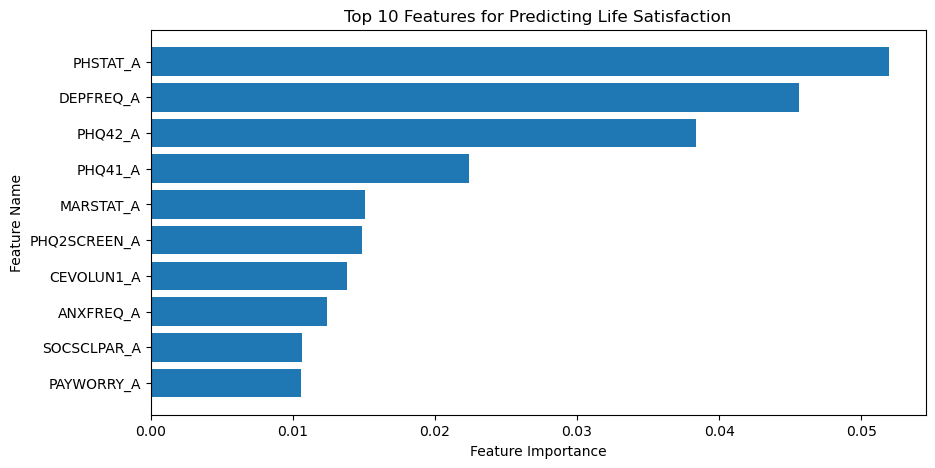

ModuleNotFoundError: No module named 'ace_tools'

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importances from the trained XGBoost model
feature_importances = best_xgb.feature_importances_
feature_names = np.array(X_train_selected.columns)

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_n = 10  # Change this number to get more/less features

# Select top 10 features
top_features = feature_names[sorted_indices[:top_n]]
top_importances = feature_importances[sorted_indices[:top_n]]

# Create DataFrame for easy viewing
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# Plot top 10 features
plt.figure(figsize=(10, 5))
plt.barh(top_features[::-1], top_importances[::-1], align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Features for Predicting Life Satisfaction")
plt.show()

# Display the top features in table format
import ace_tools as tools
tools.display_dataframe_to_user(name="Top 10 Important Features", dataframe=top_features_df)




🔹 Top 10 Features for Predicting Life Satisfaction:

        Feature  Importance
0      PHSTAT_A    0.051912
1     DEPFREQ_A    0.045601
2       PHQ42_A    0.038388
3       PHQ41_A    0.022432
4     MARSTAT_A    0.015078
5  PHQ2SCREEN_A    0.014866
6    CEVOLUN1_A    0.013814
7     ANXFREQ_A    0.012379
8   SOCSCLPAR_A    0.010650
9    PAYWORRY_A    0.010565


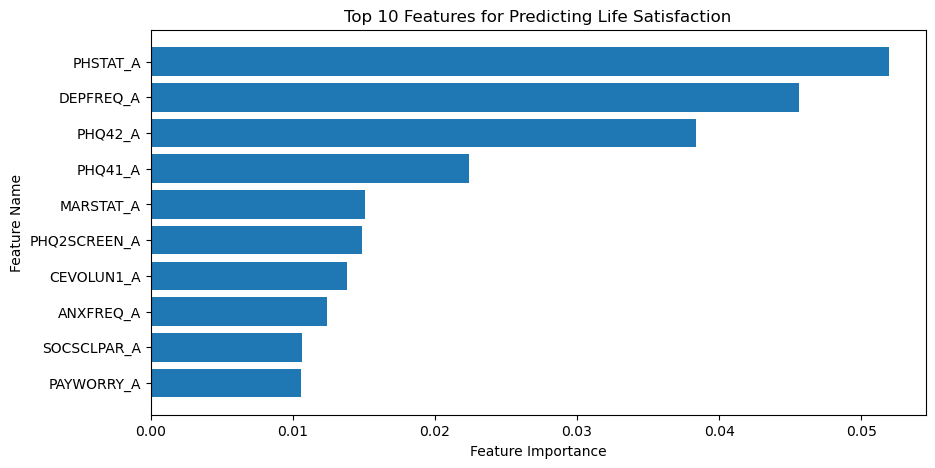

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importances from the trained XGBoost model
feature_importances = best_xgb.feature_importances_
feature_names = np.array(X_train_selected.columns)

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_n = 10  # Change this number to get more/less features

# Select top 10 features
top_features = feature_names[sorted_indices[:top_n]]
top_importances = feature_importances[sorted_indices[:top_n]]

# Create DataFrame for easy viewing
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# Print the top features
print("\n🔹 Top 10 Features for Predicting Life Satisfaction:\n")
print(top_features_df)

# Plot top 10 features
plt.figure(figsize=(10, 5))
plt.barh(top_features[::-1], top_importances[::-1], align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Features for Predicting Life Satisfaction")
plt.show()
